# Low pass and high pass in frequency domain

In [13]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io
from google.colab.patches import cv2_imshow # for image display
import skimage.io as sk
from PIL import Image 
import math 

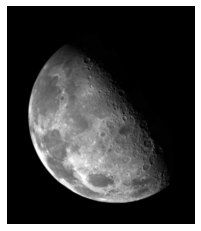

In [14]:
# original image
img = cv2.imread('norpole.jpg',0)

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

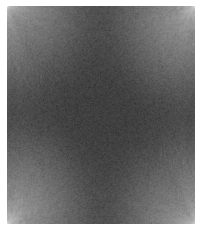

In [15]:
# image in frequency domain
F = np.fft.fft2(img) # Compute the 2-dimensional discrete Fourier Transform.
plt.imshow(np.log1p(np.abs(F)), cmap='gray') # Calculates log(1 + x).
plt.axis('off') 
plt.show()

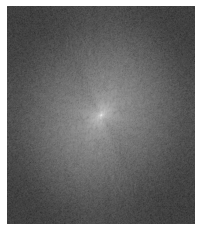

In [16]:
Fshift = np.fft.fftshift(F) # Shift the zero-frequency component to the center of the spectrum.
plt.imshow(np.log1p(np.abs(Fshift)), cmap='gray') 
plt.axis('off')
plt.show()

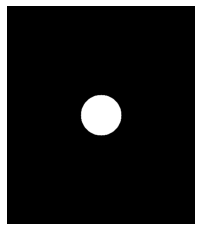

In [17]:
# Filter: Low pass filter
M,N = img.shape
H = np.zeros((M,N), dtype=np.float32)
D0 = 50
for u in range(M):
    for v in range(N):
        D = np.sqrt((u-M/2)**2 + (v-N/2)**2)
        if D <= D0:
            H[u,v] = 1
        else:
            H[u,v] = 0
            
plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

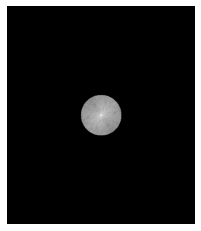

In [18]:
# Ideal Low Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

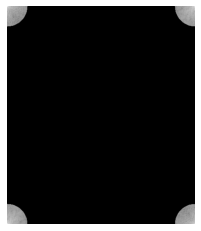

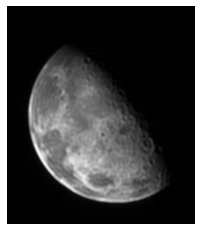

In [19]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

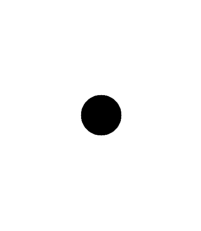

In [20]:
# Filter: High pass filter
H = 1 - H

plt.imshow(H, cmap='gray')
plt.axis('off')
plt.show()

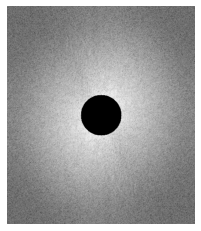

In [21]:
# Ideal High Pass Filtering
Gshift = Fshift * H
plt.imshow(np.log1p(np.abs(Gshift)), 
           cmap='gray')
plt.axis('off')
plt.show()

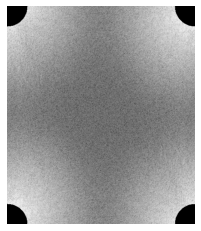

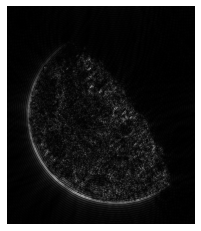

In [22]:
# Inverse Fourier Transform
G = np.fft.ifftshift(Gshift)
plt.imshow(np.log1p(np.abs(G)), 
           cmap='gray')
plt.axis('off')
plt.show()

g = np.abs(np.fft.ifft2(G))
plt.imshow(g, cmap='gray')
plt.axis('off')
plt.show()

## Manual approach

In [23]:
img = img.astype('float64')
for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    if((i+j)%2 == 0):
      img[i][j] = img[i][j] * (-1)

In [24]:
fi = np.fft.fft2(img)

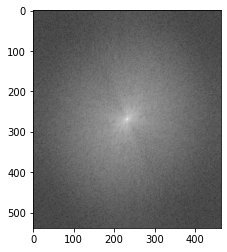

In [25]:
plt.imshow(np.log(abs(fi)), cmap="gray")

In [26]:
mask = np.zeros(fi.shape)

r = 30
a = float(img.shape[0]/2)
b = float(img.shape[1]/2)
for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    if(math.sqrt(((i-a)**2) + ((j-b)**2))>r):
      mask[i][j] = 1

In [27]:
ffi = np.zeros(fi.shape)
ffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    if(mask[i][j]==1):
      ffi[i][j] = fi[i][j]
    else:
      ffi[i][j] = complex(0,0)

In [28]:
inverse_ffi = np.fft.ifft2(ffi)

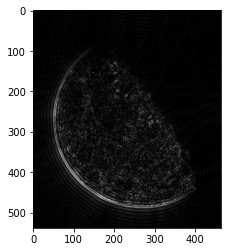

In [29]:
plt.imshow(abs(inverse_ffi), cmap="gray")

In [51]:
butworth_mask = np.zeros(fi.shape)

r = 30
n = 1
a = float(img.shape[0]/2)
b = float(img.shape[1]/2)
for i in range(0, img.shape[0]):
  for j in range(0, img.shape[1]):
    d = math.sqrt(((i-a)**2) + ((j-b)**2))
    butworth_mask[i][j] = 1/(1+(d/r)**(2*n))

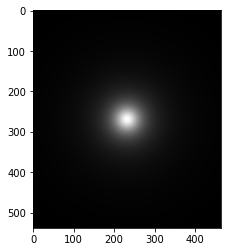

In [52]:
plt.imshow(butworth_mask, cmap="gray")

In [53]:
bffi = np.zeros(fi.shape)
bffi = ffi.astype('complex')

for i in range(0, fi.shape[0]):
  for j in range(0, fi.shape[1]):
    bffi[i][j] = fi[i][j] * butworth_mask[i][j]

In [54]:
b_inverse_ffi = np.fft.ifft2(bffi)

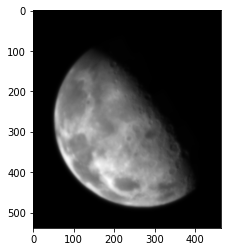

In [55]:
plt.imshow(abs(b_inverse_ffi), cmap="gray")